<a href="https://colab.research.google.com/github/kavyatejaswini24/EMIPredict-AI---Intelligent-Financial-Risk-Assessment-Platform/blob/main/4_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taxi Fare Data**

# Importing Dataset from Kaggle

In [ ]:
import kagglehub
import warnings
warnings.filterwarnings("ignore")

# Download latest version
path = kagglehub.dataset_download("hrish4/taxi-trip-fare-data-2023")

print("Path to dataset files:", path)

100%|██████████| 52.4M/52.4M [00:01<00:00, 52.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hrish4/taxi-trip-fare-data-2023/versions/1


In [ ]:
import os
os.listdir(path)

['Taxi_Trip_Data_preprocessed.csv']

In [ ]:
import pandas as pd
data = pd.read_csv(os.path.join(path, 'Taxi_Trip_Data_preprocessed.csv'))
data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,3.70,Card,24.0,27.950000
1,1,2.77,Card,18.4,19.200000
2,1,3.30,Card,22.6,27.383333
3,1,0.30,Cash,5.1,2.550000
4,1,0.83,Card,7.2,5.250000


# Understand the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451090 entries, 0 to 8451089
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  int64  
 1   trip_distance    float64
 2   payment_type     object 
 3   fare_amount      float64
 4   duration         float64
dtypes: float64(3), int64(1), object(1)
memory usage: 322.4+ MB


In [ ]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,8.451090e+06,8.451090e+06,8.451090e+06,8.451090e+06
mean,1.339824e+00,1.751135e+00,1.273180e+01,1.173603e+01
std,7.658024e-01,1.045488e+00,5.346809e+00,6.218064e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.700000e-01,8.600000e+00,6.900000e+00
50%,1.000000e+00,1.500000e+00,1.210000e+01,1.065000e+01
75%,1.000000e+00,2.300000e+00,1.630000e+01,1.561667e+01
max,5.000000e+00,5.230000e+00,4.080000e+01,2.995000e+01


In [ ]:
# Check for nulls
data.isnull().sum()

,0
passenger_count,0
trip_distance,0
payment_type,0
fare_amount,0
duration,0


# Handling Duplicates

In [ ]:
data.duplicated().sum()

5557871

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(2893219, 5)

# **Outliers Treatment**

In [ ]:
numerical_cols = data.select_dtypes(exclude='object').columns
numerical_cols

Index(['passenger_count', 'trip_distance', 'fare_amount', 'duration'], dtype='object')

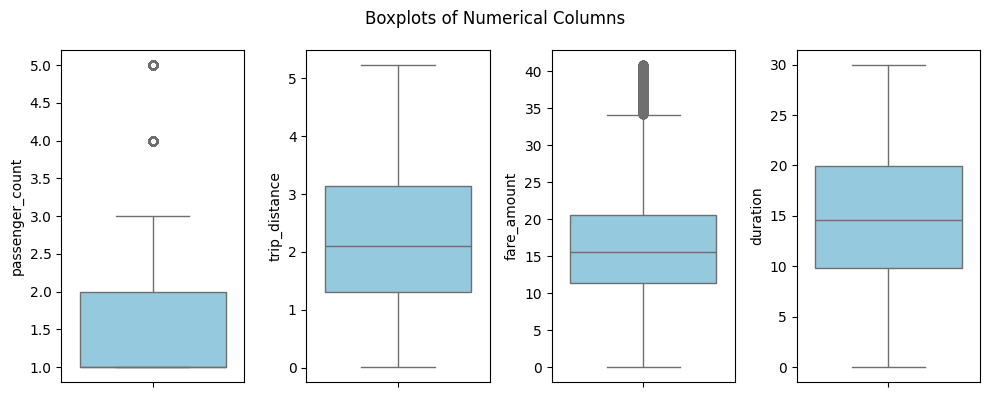

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through numerical columns and create boxplots

plt.figure(figsize=(10, 4))
plt.suptitle('Boxplots of Numerical Columns')
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='skyblue',)
    plt.tight_layout()

## **Treating Outliers by calculating Z_scores**


🔹 What is Z-Score?


> * Z-score measures how far a data point is from the mean in terms of standard deviations.

It is calculated as:

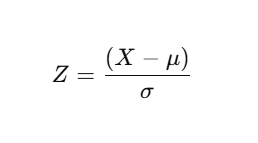


Where:

**X** = Data point

**μ** = Mean of the dataset

**σ** = Standard deviation


If the absolute Z-score of a data point is greater than a threshold (commonly 3), it is considered an outlier.

In [ ]:
import numpy as np
from scipy import stats

# Calculate Z-Scores
z_scores = np.abs(stats.zscore(data['fare_amount']))  # Take absolute value

# Define threshold (commonly 3)
threshold = 3

data = data[z_scores < threshold]  # selecting only the rows with Z_scores less than 3


print(data.shape)

(2891964, 5)


# Encoding

In [ ]:
encoded_df = pd.get_dummies(data['payment_type'], dtype=int)

encoded_df.columns = ['payment_type_' + col for col in encoded_df.columns]

data = pd.concat([data, encoded_df], axis=1)

data.drop('payment_type', axis=1, inplace=True)

In [ ]:
data.head()

,passenger_count,trip_distance,fare_amount,duration,payment_type_Card,payment_type_Cash
0,1,3.70,24.0,27.950000,1,0
1,1,2.77,18.4,19.200000,1,0
2,1,3.30,22.6,27.383333,1,0
3,1,0.30,5.1,2.550000,0,1
4,1,0.83,7.2,5.250000,1,0


# Skewness

In [ ]:
skewness = data.skew()
skewness

,0
passenger_count,1.626560
trip_distance,0.461142
fare_amount,0.095767
duration,0.166679
payment_type_Card,-1.003790
payment_type_Cash,1.003790


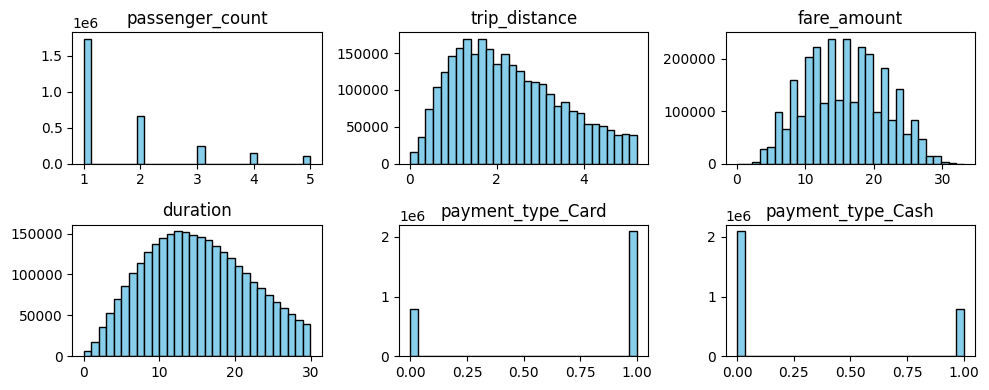

In [ ]:
# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness.index

# Plot histograms before transformation
plt.figure(figsize=(10,4))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2,3,i)
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

# Correlation

<Axes: >

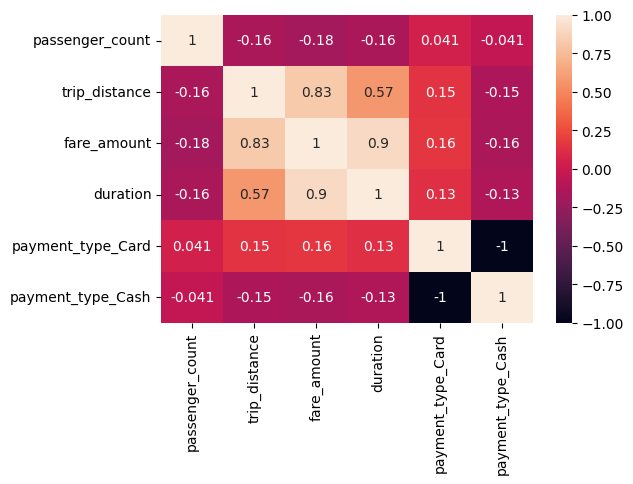

In [ ]:
corr_matrix = data.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True)

# Model Building

In [ ]:
data.dtypes

,0
passenger_count,int64
trip_distance,float64
fare_amount,float64
duration,float64
payment_type_Card,int64
payment_type_Cash,int64


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.to_csv("data_cleaned.csv",index=False)

In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("data_cleaned.csv").sample(frac=0.357, random_state=42)  # sampling

In [ ]:
X = df.drop('fare_amount',axis=1)
y = df['fare_amount']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,0.705130,1.415296,1.189662,0.957368
Decision Tree Regressor,0.868840,2.274757,1.508230,0.931480
Random Forest Regressor,0.732615,1.491397,1.221228,0.955076
XGBoost Regressor,0.619039,1.153235,1.073888,0.965262


# Crossvalidation

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the model
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(xgb, X, y, cv=kf, scoring='r2')

# Print all 5 scores
print(f"All 5-Fold Scores: {cv_scores}")
print()
# Compare Mean and Standard Deviation
print(f"Mean R2 Score: {np.mean(cv_scores):.4f}")

All 5-Fold Scores: [0.96406878 0.96670028 0.96516881 0.96521787 0.96614036]

Mean R2 Score: 0.9655


# Example code for prediction using the trained model

# Save your tuned model

In [ ]:
import pickle

with open("model.pkl",'wb') as file:
  file.dump(kf,file )

# Load your model

In [ ]:
with open("model.pkl",'r') as file:
  model = file.load(file )

# Save your preprocessors or pipeline similarly

In [ ]:
with open("preprocessor.pkl",'wb') as file:
  file.dump(preprocessor,file )

In [ ]:
with with open("pipeline.pkl",'wb') as file:
  file.dump(pipeline,file )

In [ ]:
# get the user input

my_df = {"passenger_count	": input()
        " trip_distance"	:input()
         'duration'	:input()
        'payment_type':input()}

data = pd.DataFrame(my_df)

encoded_df = pd.get_dummies(data['payment_type'], dtype=int)

encoded_df.columns = ['payment_type_' + col for col in encoded_df.columns]

data = pd.concat([data, encoded_df], axis=1)
model.predict([data])

In [ ]:
# Load the models and do the predictions on the user input

pipeline.predict(dataframe)